In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir(r'/Users/a0s04np/ML/EnsembleTechniques/')
%matplotlib inline

In [13]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
print(f'Info:{df.info()}')
print(f'Shape:{df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Info:None
Shape:(45211, 17)


In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [16]:
#replace maritial status, education, job, loan,  to convert into numeric data
df = pd.get_dummies(df, columns = ['marital'])
df = pd.get_dummies(df, columns = ['education'])
df = pd.get_dummies(df, columns = ['job'])

df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,no,2143,yes,no,unknown,5,may,261,1,...,0,0,1,0,0,0,0,0,0,0
1,44,no,29,yes,no,unknown,5,may,151,1,...,0,0,0,0,0,0,0,1,0,0
2,33,no,2,yes,yes,unknown,5,may,76,1,...,1,0,0,0,0,0,0,0,0,0
3,47,no,1506,yes,no,unknown,5,may,92,1,...,0,0,0,0,0,0,0,0,0,0
4,33,no,1,no,no,unknown,5,may,198,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,nov,977,3,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,cellular,17,nov,456,2,...,0,0,0,1,0,0,0,0,0,0
45208,72,no,5715,no,no,cellular,17,nov,1127,5,...,0,0,0,1,0,0,0,0,0,0
45209,57,no,668,no,no,telephone,17,nov,508,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#convert loan, housing, Target into binary variables
df.loan = df.loan.replace('yes', 1)
df.loan = df.loan.replace('no', 0)

df.housing = df.housing.replace('yes', 1)
df.housing = df.housing.replace('no', 0)

df.Target = df.Target.replace('yes', 1)
df.Target = df.Target.replace('no', 0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24c69ad0>,
      dtype=object)

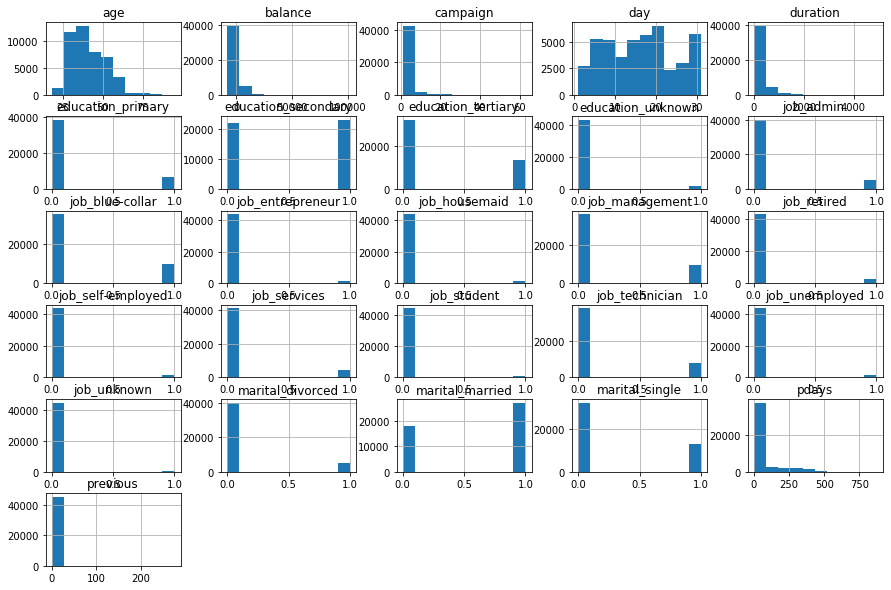

In [18]:
df.hist(bins=10, figsize=(15,10), )

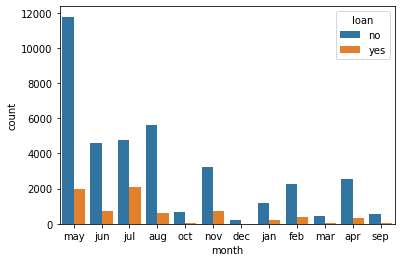

In [23]:
sns.countplot(x= 'month', hue='loan', data=df)